## TOC

1. Preparation   
2. Security implication considerations   
3. Setting regions   
4. Excluding low spenders   
5. Creating customer profile variables   
6. Analyzing customer profiles   
7. Aggregating profile data   
8. Analyzing profiles across regions & departments   

## Prep

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing data
path = r'C:\Users\Ryzen RGB Madness!!!\Instacart Basket Analysis'

In [3]:
insta_complete = pd.read_pickle(os.path.join(path, '02 Data', 'Cleaned', 'instacart_complete.pkl'))

In [4]:
# Verifying import
insta_complete.shape

(32404859, 29)

## Task Pt 1

#### 4.10.2 - Security Implications

In [5]:
insta_complete.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spender_type,frequency,freq_flag,gender,state,age,date_joined,family_members,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


I removed the name column when we merged the customer data, as a number of the name fields were blank. A name field isn't necessary in analysis data when you have the user ID - for example, if you need a list of the top 10 customers, you can pull those user IDs and then look up that information to contact the customers for whatever you're sending them for being in the top 10. 

As that was the main PII information in the customer information database, there is nothing else to scrub. Everything else that's left is generic (for example, user ID 1 is a female that lives in Alabama and is married with one child, with an income of 40k. While that pulls out a specific demographic, it is NOT enough to narrow it down to identify who user ID one is, not without a name or email address or home address). 

#### 4.10.3 - Regions of the US

In [6]:
# Creating regions
result = []

for value in insta_complete['state']:
    if value in ["Maine","New Hampshire","Vermont","Massachusetts","Rhode Island","Connecticut","New York","Pennsylvania","New Jersey"]:
            result.append("Northeast")
    elif value in ["Wisconsin","Michigan","Illinois","Indiana","Ohio", "North Dakota","South Dakota","Nebraska","Kansas","Minnesota","Iowa","Missouri"]:
            result.append("Midwest")
    elif value in ["Delaware","Maryland","District of Columbia","Virginia","West Virginia","North Carolina","South Carolina","Georgia","Florida","Kentucky","Tennessee","Mississippi","Alabama","Oklahoma","Texas","Arkansas","Louisiana"]:
            result.append("South")
    else:
            result.append("West")

In [7]:
# Adding regions to data
insta_complete['region'] = result

In [8]:
# Checking region addition
insta_complete.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency,freq_flag,gender,state,age,date_joined,family_members,marital_status,income,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [9]:
# Verifying column names
insta_complete.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spender_type', 'frequency', 'freq_flag', 'gender', 'state', 'age',
       'date_joined', 'family_members', 'marital_status', 'income', 'region'],
      dtype='object')

In [10]:
# Creating crosstab for spending habits across regions
crosstab = pd.crosstab(insta_complete['region'], insta_complete['spender_type'], dropna=False)

In [11]:
# Copying crosstab to clipboard
crosstab.to_clipboard()

#### 4.10.4 - Creating Exclusion Flag for Low Spenders

In [12]:
# Creating exclusion flag
insta_complete.loc[insta_complete['max_order'] < 5, 'activity_level'] = 'Low activity'

In [13]:
# Verifying column
insta_complete.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,freq_flag,gender,state,age,date_joined,family_members,marital_status,income,region,activity_level
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN


In [14]:
# Verifying low activity flag counts
insta_complete['activity_level'].value_counts(dropna=False)

activity_level
NaN             30964564
Low activity     1440295
Name: count, dtype: int64

In [15]:
low_activity = insta_complete[insta_complete['activity_level'] == 'Low activity']

In [16]:
# Verifying low activity numbers
low_activity.shape

(1440295, 31)

In [17]:
# Exporting low activity customers
low_activity.to_csv(os.path.join(path, '04 Analysis','Reports','low_activity.csv'))

In [18]:
# Creating dataframe for non-low-activity customers (final output)
insta_final = insta_complete[insta_complete.activity_level != 'Low activity']

In [19]:
# Verifying insta_final shape
insta_final.shape

(30964564, 31)

In [20]:
# Removing activity_level flag column as it is not necessary for analysis
insta_final = insta_final.drop(columns=['activity_level'])

In [21]:
# Verifying drop
insta_final.shape

(30964564, 30)

In [22]:
# Exporting final dataframe
insta_final.to_pickle(os.path.join(path, '02 Data','Cleaned','insta_final.pkl'))

#### 4.10.5 - Customer Profiling Variables

SETUP NOTES FOR FLAGS

Demo Label - Age - Income - Dept ID - Dependents

College Students (18-25 / < 35000 / 1 / 0) // Pet Owners (18-80 / any / 8 / any) // Parents with Babies (18-50 / any / 18 / 2+)

In [23]:
# Pulling column list for reference
insta_final.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spender_type', 'frequency', 'freq_flag', 'gender', 'state', 'age',
       'date_joined', 'family_members', 'marital_status', 'income', 'region'],
      dtype='object')

In [24]:
# Setting College Student profile flag
insta_final.loc[(insta_final['department_id']==1) & (insta_final['age']<=24) & (insta_final['income']<=35000), 'cust_profile'] = 'College student'

In [25]:
# Setting Pet Owner profile flag
insta_final.loc[(insta_final['department_id']==8) & (insta_final['age']<=80), 'cust_profile'] = 'Pet owner'

In [26]:
# Setting Baby Parent profile flag
insta_final.loc[(insta_final['department_id']==18) & (insta_final['age']<=50) & (insta_final['family_members']>=2), 'cust_profile'] = 'Baby parent'

In [27]:
# Checking profile flag counts for usefulness
insta_final.groupby('cust_profile')['user_id'].nunique()

cust_profile
Baby parent         7801
College student      810
Pet owner          12977
Name: user_id, dtype: int64

In [28]:
# Looking at straight value counts of customer profile flags
insta_final['cust_profile'].value_counts(dropna=False)

cust_profile
NaN                30754865
Baby parent          108278
Pet owner             91719
College student        9702
Name: count, dtype: int64

Possibly, broke college students aren't going to be using Instacart much (it certainly could feel like a luxury to have your groceries delivered and when you're counting pennies you might not spend them on that). 

With this data, it looks like baby parents are making more repeat orders than pet owners, but when the profiles are segmented out by user ID, there are more pet owner user IDs that meet the criteria.

For this portion of the task, though there are fewer baby parent-centric user IDs, I will be using that demographic for my visualizations and aggregate data. 

#### 4.10.6 - Customer Profile Analysis

In [29]:
# Creating profiles dataframe for visualizations
insta_profiles = insta_final[insta_final['cust_profile'].notnull()]

In [30]:
# Checking profiles count
insta_profiles['cust_profile'].value_counts(dropna=False)

cust_profile
Baby parent        108278
Pet owner           91719
College student      9702
Name: count, dtype: int64

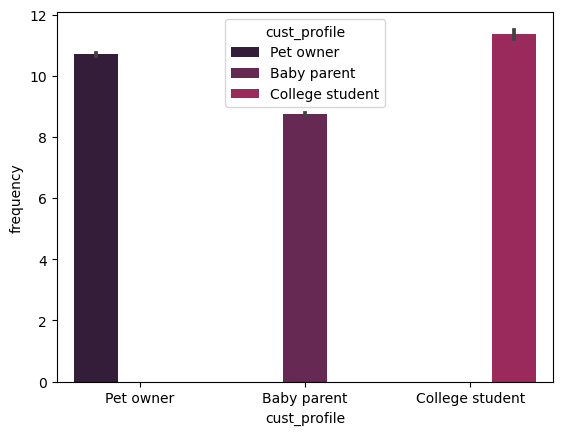

In [61]:
# Bar chart for frequency of each profile
sns.set_palette('rocket')
bar = sns.barplot(insta_profiles, x='cust_profile', y='frequency', hue='cust_profile')

In [62]:
# Exporting bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_profiles.png'))

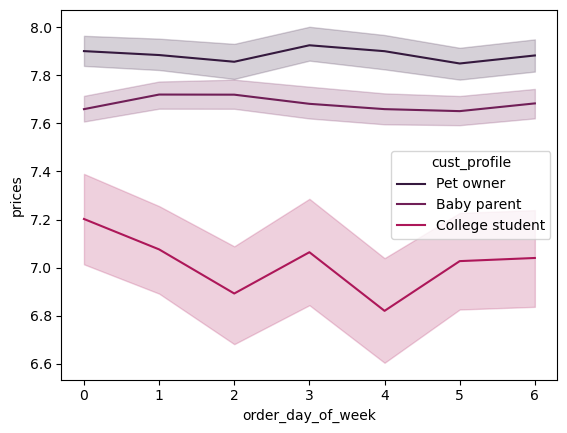

In [59]:
# Plotting when during the week different profiles order, and how much they spend
sns.set_palette('rocket')
line = sns.lineplot(data=insta_profiles, x='order_day_of_week', y='prices', hue='cust_profile')

In [60]:
# Exporting day of week chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_profiles_by_day.png'))

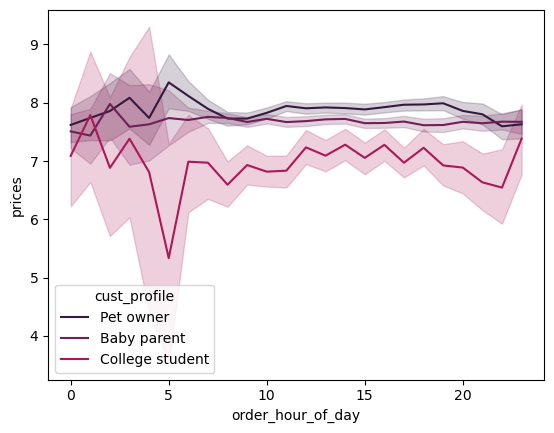

In [57]:
# Plotting when different profiles order during the day and how much they spend
sns.set_palette('rocket')
line_2 = sns.lineplot(data=insta_profiles, x='order_hour_of_day', y='prices', hue='cust_profile')

In [58]:
# Exporting by hour line chart
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_profiles_by_hour.png'))

#### 4.10.7 - Aggregating profile data

In [37]:
# Aggregating profile data for usage frequency
insta_profiles.groupby('cust_profile').agg({'frequency': ['mean', 'min', 'max']})

frequency           
                      mean  min   max
cust_profile                         
Baby parent       8.736452  0.0  30.0
College student  11.356009  0.0  30.0
Pet owner        10.698432  0.0  30.0

In [38]:
# Aggregating profile data by expenditure
insta_profiles.groupby('cust_profile').agg({'prices': ['mean', 'min', 'max']})

prices           
                     mean  min   max
cust_profile                        
Baby parent      7.682007  1.0  15.0
College student  7.027974  1.0  15.0
Pet owner        7.885109  1.0  15.0

#### 4.10.8 - Comparing profile data with regions & departments

In [39]:
# Creating crosstab to compare customer profiles across regions
crosstab = pd.crosstab(insta_profiles['cust_profile'], insta_profiles['region'], dropna=False)

In [40]:
# Copying crosstab to Excel
crosstab.to_clipboard()

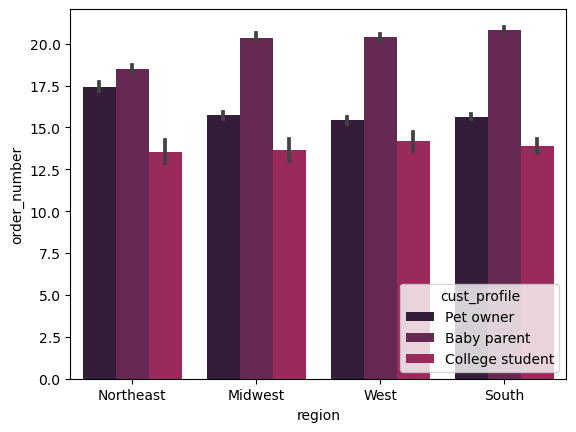

In [55]:
# Showing distribution of profiles across regions
sns.set_palette('rocket')
bar_2 = sns.barplot(insta_profiles, x="region", y="order_number", hue="cust_profile")
sns.move_legend(bar_2, "lower right")

In [56]:
# Exporting profiles across regions
bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_profiles_by_region.png'))

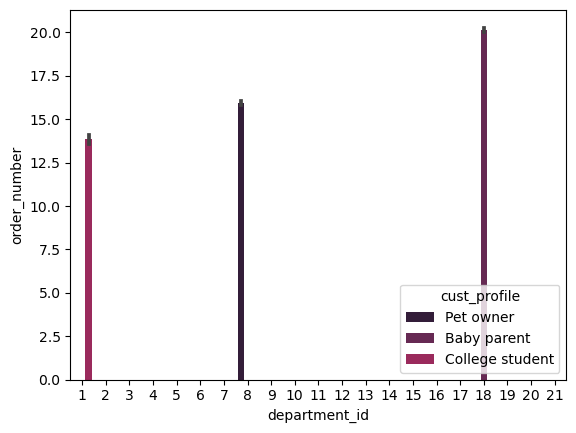

In [48]:
# Showing distribution of profiles across department IDs
sns.set_palette('rocket')
bar_3 = sns.barplot(insta_final, x="department_id", y="order_number", hue="cust_profile")
sns.move_legend(bar_3, "lower right")

In [49]:
# Export distribution of profiles across department IDs
bar_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_profiles_by_department.png'))

In [45]:
# Exporting profiles dataframe
insta_profiles.to_pickle(os.path.join(path, '02 Data','Cleaned','insta_profiles.pkl'))

In [54]:
# Export distribution of profiles across department IDs
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'final_loyalty.png'))